In [1]:
%matplotlib widget

## Calibration of camera geometry

This calibration is performed using pyfai library. It generates a *.poni file that contains all required information for further data processing.

Note that beam center is automatically recalibrated before image processing. Distance and camera roation angles are assumed constant.

In [ ]:
from calibration import perform_geometric_calibration
datapath = '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/'
sample_diff_calib = datapath + "80X_Metro_200kV_0890.dm4" # Au calibrant diffraction data
# path to Au cif file used for calibration
cif_file = "/home-local/ratel-ra/Documents/CIF_database/Au_fixed.cif"

perform_geometric_calibration(
    image_file=sample_diff_calib,
    cif_file = cif_file)

## Create instance of SAEDProcessor

An instance is intialized with the following args:
- dm4_file: str path to SAED diffraction image 
- poni_file:str path to poni calibration file
- beamstop: bool indicates the presence of beamstop on diffraction image (impact on the procedure used to recalibrate the data)
- verbose: bool prints metadata

In [1]:
from ePDFsuite import SAEDProcessor

datapath = '/home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/'
sample_diff = datapath + "80X_Metro_200kV_0925.dm4" # Au NPs diffraction data

poni_file = './calibration_default_topleft.poni'  # PONI file obtained from calibration step

proc = SAEDProcessor(sample_diff,
                     poni_file,
                     beamstop=False,
                     verbose=True)


Loaded file: /home-local/ratel-ra/Documents/ePDF_project/TEM_data/JEM_200/starter_kit/80X_Metro_200kV_0925.dm4
Sample information:
  binning: 1
  description: Gatan 80X Metro direct electron detector
  image_height: 2048
  image_width: 2048
  pixel_size: 5
  camera_type: Gatan 80X Metro
  camera_title: 80X_Metro_200kV_0925
  wavelength: 0.025079340450548007
  exposure_time: 120.00056385295466


**Plot 2D data**

plot normalizes data. 

Intensity scale is asjusted through $10^{v_{min}}$ and $10^{v_{max}}$.

Defaut values are $v_{min} = -4, v_{max} =0$

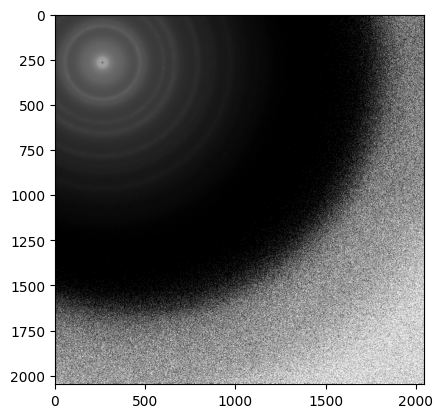

In [2]:
proc.plot(vmin=-4, vmax=1)

**Integrate**

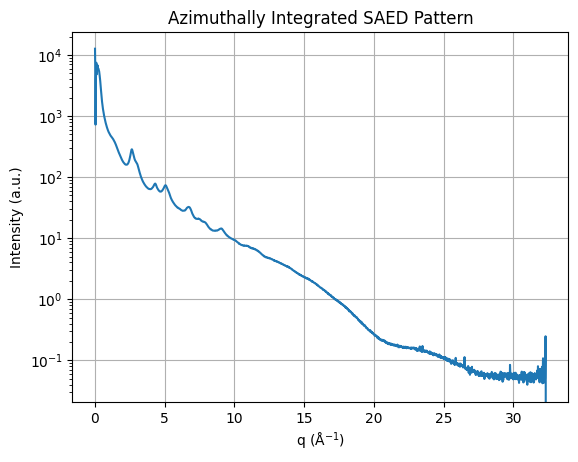

In [3]:
q,i = proc.integrate(plot=True) # here q = 2pi*k 

**Extract PDF**

1/ automatic mode (default parameters)

Compute PDF with default parameters


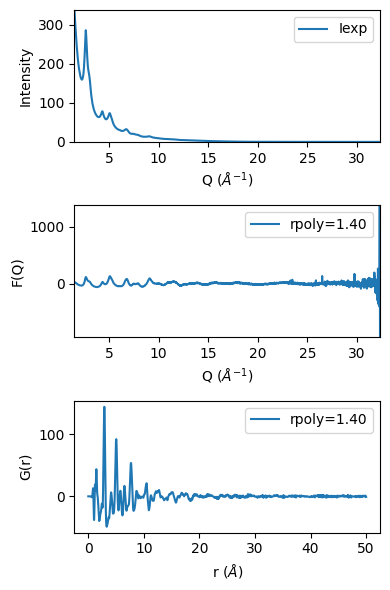

PDF saved to Au_NPs_epdf.gr


In [4]:
ref_diff = datapath+ '80X_Metro_200kV_0912.dm4' # amorphous C grid diffraction data

proc.extract_epdf(
    ref_diffraction_image=ref_diff,
    composition = 'Au',                     
    rmin=0.1,
    rmax=50.0,
    rstep=0.01,
    interactive = False,
    plot = True,
    outputfile = 'Au_NPs_epdf.gr')

2/ Interactive mode

In [5]:
proc.extract_epdf(
    ref_diffraction_image=ref_diff,
    composition = 'Au',                     
    rmin=0.1,
    rmax=50.0,
    rstep=0.01,
    interactive = True,
    outputfile = 'Au_NPs_epdf.gr')

Adjust sliders to optimize PDF parameters. Click "Save" to export results.
